In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
from google.colab import files
uploaded = files.upload()


Saving BTC-USD.csv to BTC-USD.csv


In [3]:
df = pd.read_csv('BTC-USD.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

             ds             y
0    2020-02-15   9889.424805
1    2020-02-16   9934.433594
2    2020-02-17   9690.142578
3    2020-02-18  10141.996094
4    2020-02-19   9633.386719
..          ...           ...
362  2021-02-11  47909.332031
363  2021-02-12  47504.851563
364  2021-02-13  47105.515625
365  2021-02-14  48717.289063
366  2021-02-15  48585.937500

[367 rows x 2 columns]


In [4]:
prophet = Prophet()
prophet.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = prophet.make_future_dataframe(periods=365)
print(future)

            ds
0   2020-02-15
1   2020-02-16
2   2020-02-17
3   2020-02-18
4   2020-02-19
..         ...
727 2022-02-11
728 2022-02-12
729 2022-02-13
730 2022-02-14
731 2022-02-15

[732 rows x 1 columns]


In [6]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
532,2021-07-31,98288.831789,89882.722308,106278.417725
533,2021-08-01,98462.997337,89674.962393,106660.405332
534,2021-08-02,98914.523548,89836.081531,107477.405580
535,2021-08-03,99129.404349,90592.439095,107419.130652
536,2021-08-04,99539.421103,90770.964833,107919.387219
...,...,...,...,...
727,2022-02-11,162270.771387,136419.635297,186573.854589
728,2022-02-12,162604.936225,136213.499053,186824.687505
729,2022-02-13,162779.101774,136378.603904,187555.509001
730,2022-02-14,163230.627984,136344.227855,187977.369851


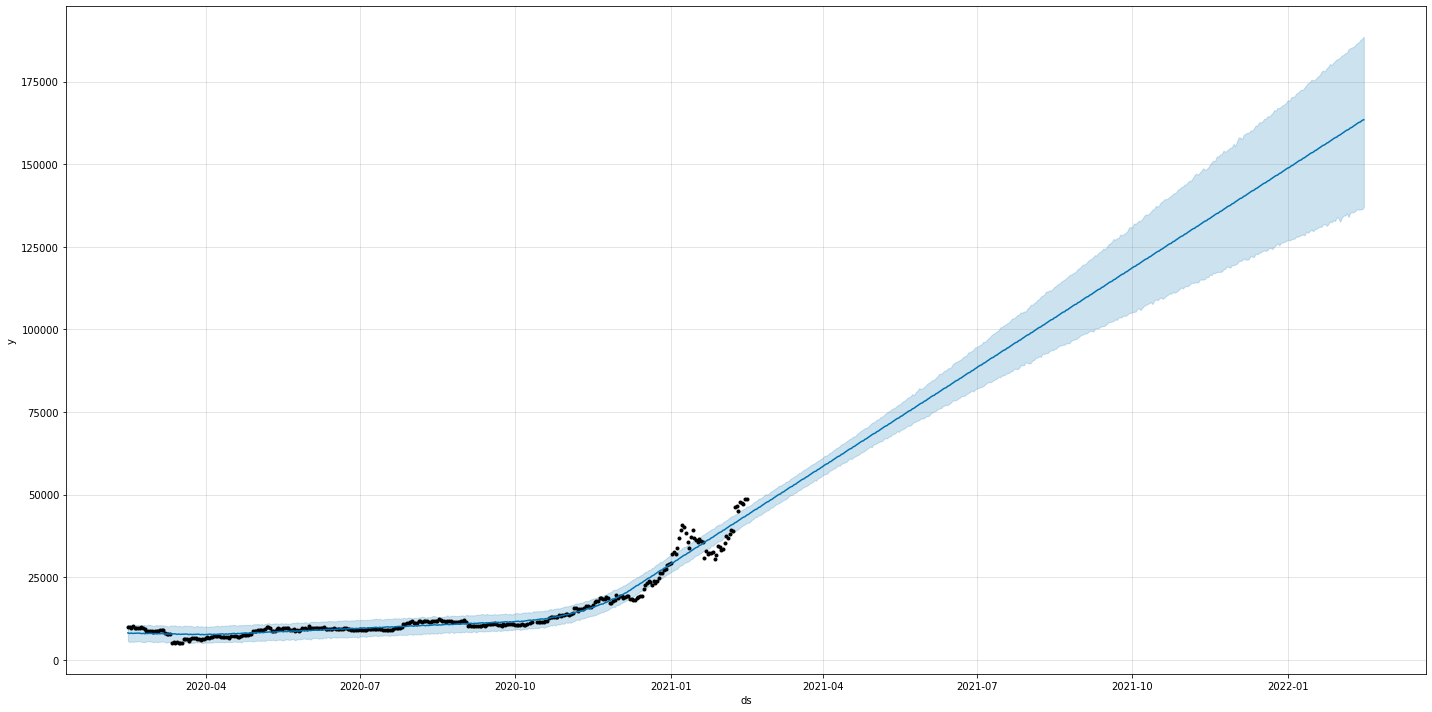

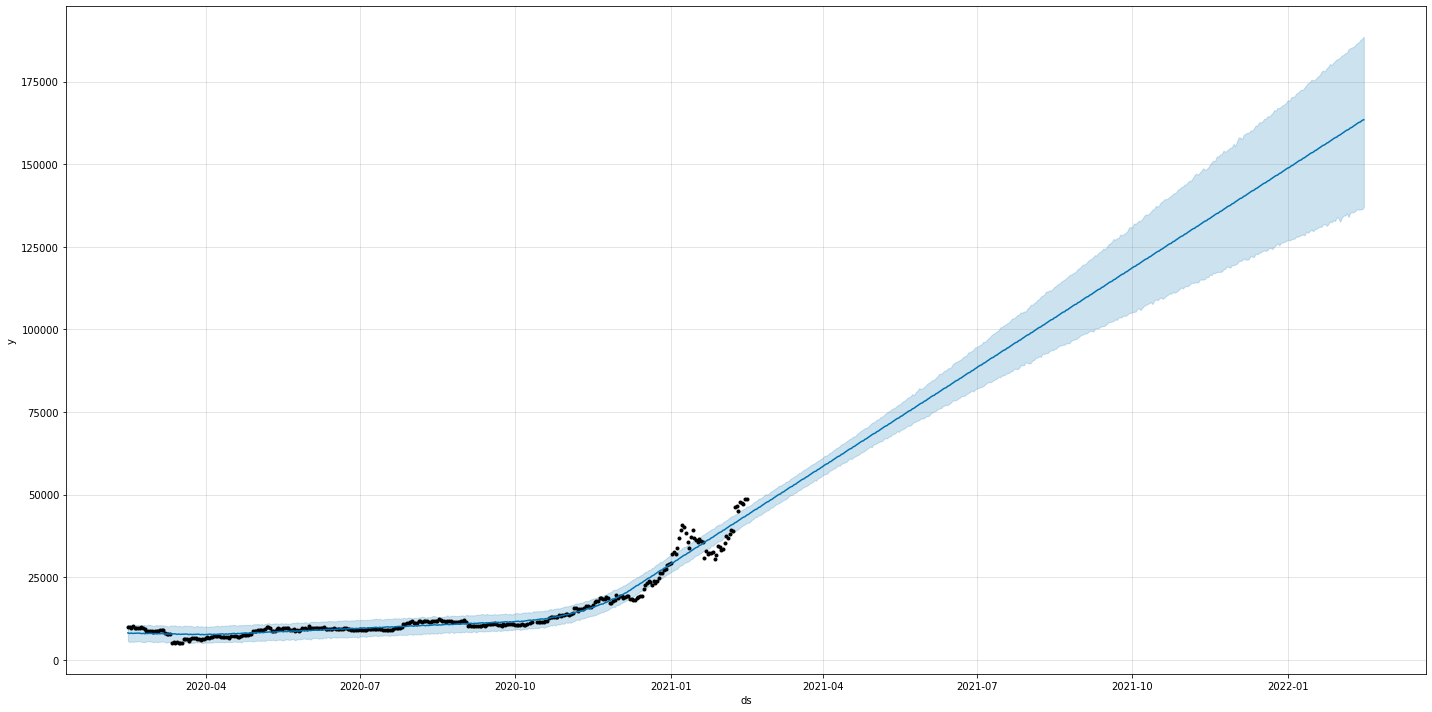

In [7]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))